In [1]:
import torch

In [2]:
print(torch.__version__)

2.7.0+cu118


In [3]:

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from torch  import nn


In [4]:
if torch.cuda.is_available():
    device = "cuda"

elif torch.backends.mps.is_available():
    device = torch.device("mps")


else:
    device = "cpu"
print(f"using devices ={device}")

using devices =cuda


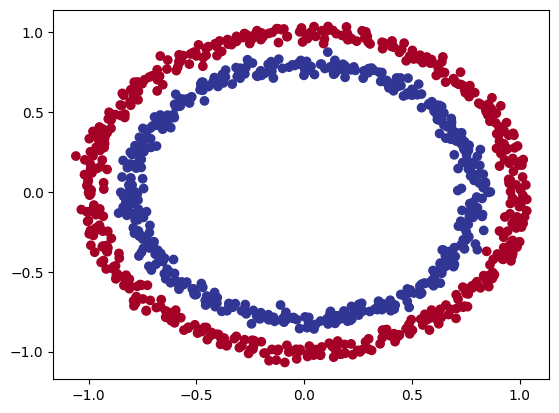

In [5]:
n_samples = 1000 
X,y = make_circles(n_samples=n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [6]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(y.shape)


torch.Size([1000])


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

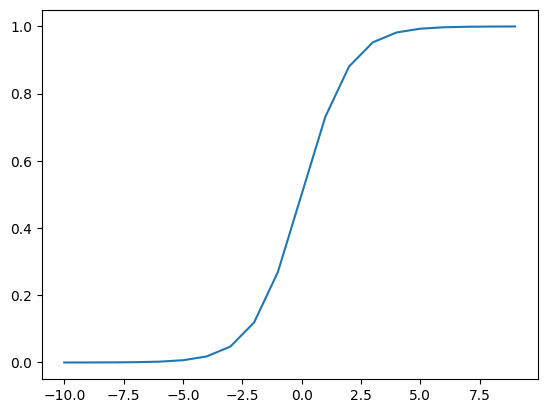

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

val = range(-10,10)
sigmoid_val = [sigmoid(n) for n in val]
plt.plot(val,sigmoid_val);

In [9]:
print(f'{sigmoid(-10):.4f}')

0.0000


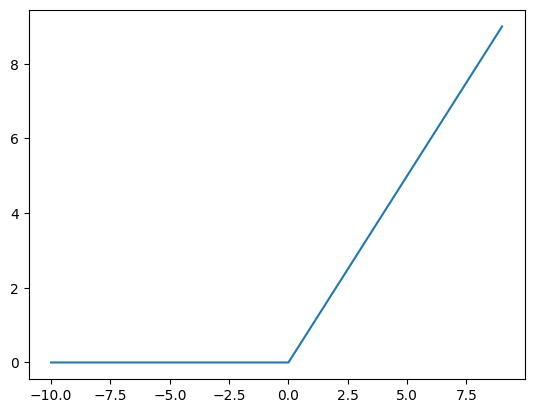

In [10]:
def relu(z):
    if z<=0:
        return 0
    else:
        return z
    
val = range(-10,10)
relu_val = [relu(n) for n in val]
plt.plot(val,relu_val);

In [11]:
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        # calling constructor of base class
        super().__init__()
        self.relu= nn.ReLU()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        

    def forward(self,x):
        x= self.layer_1(x)
        x = self.relu(x)

        x= self.layer_2(x)
        x= self.relu(x)
        
        x= self.layer_3(x)
        return x


In [12]:
model = FirstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4140,  0.6625],
         [ 0.1654, -0.4541],
         [-0.2096, -0.0371],
         [ 0.4089,  0.6864],
         [ 0.2284, -0.5383],
         [-0.4125,  0.4500],
         [ 0.3393, -0.7038],
         [ 0.5836, -0.0926],
         [ 0.4708, -0.5119],
         [-0.4958,  0.0182]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3965,  0.2104,  0.0723, -0.0463, -0.2424, -0.0854,  0.3273, -0.6142,
         -0.4264, -0.6618], requires_grad=True),
 Parameter containing:
 tensor([[-2.7243e-01,  2.2762e-01,  2.5827e-01, -2.5749e-01, -1.6853e-01,
          -6.0064e-02, -2.0414e-01, -6.4205e-02, -1.2999e-01, -3.1234e-01],
         [ 1.7905e-01,  1.7021e-01, -2.6562e-01,  2.0104e-01, -5.4517e-02,
          -2.1015e-01,  2.7012e-01, -1.8924e-01, -2.4698e-01, -1.1603e-01],
         [-2.2483e-01,  1.3080e-01, -3.0247e-01,  2.7006e-01,  1.8237e-01,
          -1.5963e-01,  5.0722e-02, -1.6693e-01,  1.3619e-01, -1.3950e-01],
         [-7.8902e-02,  8.5475e-02, 

In [13]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),lr=0.05
)

In [14]:
def accuracy_fn(y_true,y_pred):
    correct= torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc


In [ ]:
epochs = 3000
torch.manual_seed(42)
trainLossList = []
testLossList =[]
X_train,y_train =X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


model.to(device)
for epoch in range(epochs):

    model.train()
    #forward pass

    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
      #compute traininng loss
    loss = loss_fn(y_logits,y_train)
    #zero grad tha optimizer
    optimizer.zero_grad()
    #   backpropagate
    loss.backward()
    #step the optimizer

    optimizer.step()






    acc= accuracy_fn(y_true=y_train,y_pred=y_preds)

    model.eval()


    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_preds = torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_logits,y_test)
      test_acc = accuracy_fn(y_true=y_test,y_pred=test_preds)

    if  (epoch+1)%100==0:
      print(f"epoch {epoch+1} | Train_loss  {loss:.4f} | Train Acc: {acc} |  Test_loss: {test_loss:.4f} | test acc :{test_acc}")


    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())


epoch 100 | Train_loss  0.6918 | Train Acc: 50.74999999999999 |  Test_loss: 0.6927 | test acc :54.50000000000001
epoch 200 | Train_loss  0.6911 | Train Acc: 52.625 |  Test_loss: 0.6922 | test acc :50.5
epoch 300 | Train_loss  0.6903 | Train Acc: 53.125 |  Test_loss: 0.6916 | test acc :49.0
epoch 400 | Train_loss  0.6893 | Train Acc: 53.25 |  Test_loss: 0.6908 | test acc :49.5
epoch 500 | Train_loss  0.6882 | Train Acc: 53.625 |  Test_loss: 0.6899 | test acc :50.0
epoch 600 | Train_loss  0.6869 | Train Acc: 54.0 |  Test_loss: 0.6888 | test acc :50.5
epoch 700 | Train_loss  0.6856 | Train Acc: 53.625 |  Test_loss: 0.6877 | test acc :51.0
epoch 800 | Train_loss  0.6841 | Train Acc: 54.625 |  Test_loss: 0.6864 | test acc :51.0
epoch 900 | Train_loss  0.6824 | Train Acc: 53.87499999999999 |  Test_loss: 0.6850 | test acc :52.0
epoch 1000 | Train_loss  0.6804 | Train Acc: 54.0 |  Test_loss: 0.6834 | test acc :51.5
epoch 1100 | Train_loss  0.6780 | Train Acc: 55.00000000000001 |  Test_loss: 0.

In [16]:
import matplotlib.pyplot as plt

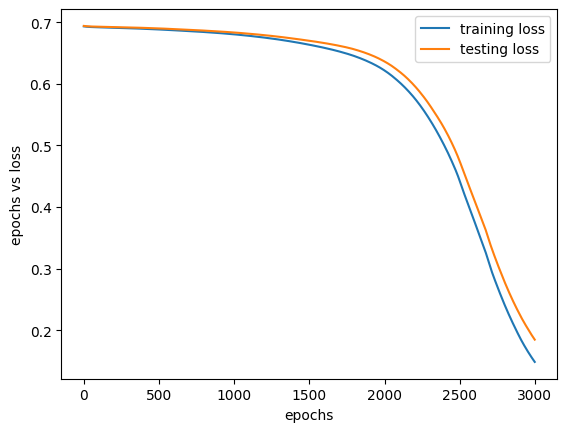

In [20]:
plt.plot(range(epochs),trainLossList , label="training loss")
plt.plot(range(epochs),testLossList , label = 'testing loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel("epochs vs loss")
plt.show()

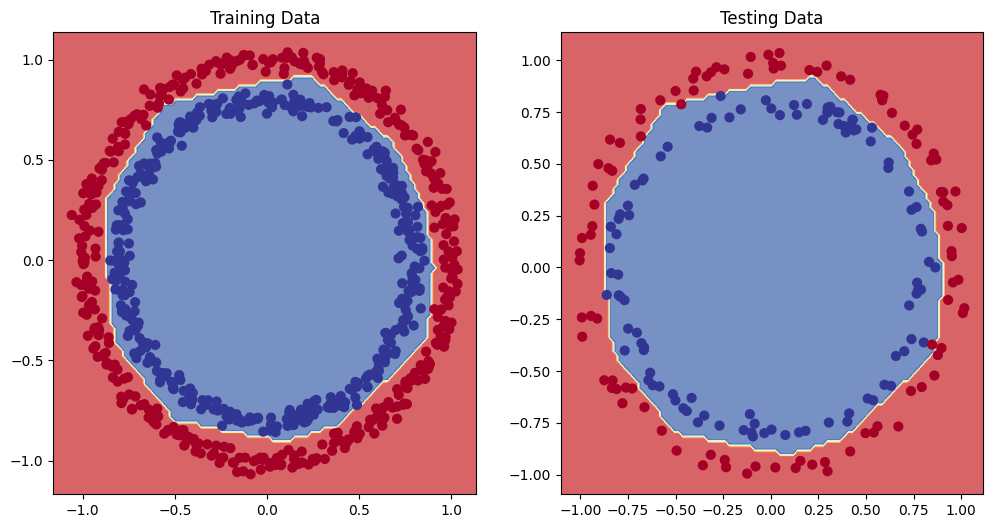

In [19]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model,X_test,y_test)